In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

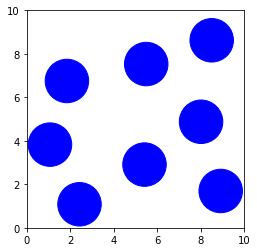

0.25132741228718347


In [2]:
def pair_potential(r, sigma): #sigma being the diameter of the disks and r the distance between them
    if r < sigma:
        return 1
    else:
        return 0
    
def calculate_total_distances(position, spheres, L, sigma):
    dists = []
    for j in range(len(spheres)):
            distance = calculate_distance(position, spheres[j], L, sigma)
            dists.append(distance)
    return dists
    
def calculate_distance(position1, position2, L, sigma):
    x1, y1 = position1
    x2, y2 = position2
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    dx = min(dx, L - dx)
    dy = min(dy, L - dy)
    return math.sqrt(dx**2 + dy**2) - sigma
    
#we start with a random configuration of N disks in a box of size L
def initial_configuration(N, L, sigma):
    spheres = []
    i = 0 
    while i < N:
        x = random.uniform(0+sigma, L-sigma)
        y = random.uniform(0+sigma, L-sigma)
        position = (x, y)
        if i > 0:
            dists = calculate_total_distances(position, spheres, L, sigma) 
            if min(dists) > 2* sigma:
                i +=1
                spheres.append(position)
            else:
                continue
                
        if i==0: 
            spheres.append(position)
            i += 1
        
    return spheres

#show the initial configuration
def show_configuration(positions, L, sigma):
    fig, ax = plt.subplots()
    for position in positions:
        x, y = position
        circle = plt.Circle((x, y), sigma, color='b')
        ax.add_artist(circle)
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


N = 8
L = 10
sigma = 1
box = initial_configuration(N, L, sigma)
show_configuration(box, L, sigma)
print(N*np.pi*sigma**2/L**2)

In [3]:
def perform_move(box, L, sigma, q):
    accepted = 0
    i = random.randint(0, len(box)-1)
    x = ((2*random.uniform(0, 1))-1)*q 
    y = ((2*random.uniform(0, 1))-1)*q
    position = box[i]
    position = (position[0] + x, position[1] + y)
    dists = calculate_total_distances(position, box, L, sigma)
    dists.pop(i)
    if min(dists) > 2* sigma and 0+ sigma <= position[0] <= L - sigma and 0 +sigma <= position[1] <=  L - sigma:
        box[i] = position
        accepted= 1
    return box, accepted

Total accepted:  3


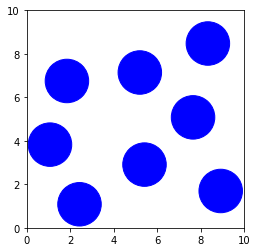

In [4]:
q = L/np.sqrt(N)
total_accepted = 0
for i in range(100):
    box, accepted = perform_move(box, L, sigma, q)
    total_accepted += accepted

print("Total accepted: ", total_accepted)   
show_configuration(box, L, sigma)

exercise 1: 
It is customary to define the packing fraction of the fluid as = ..., which
 is the total area occupied by the disks divided by the area of the system. What
 is the maximal value of one can have hard disks? (analytical computation)

KeyboardInterrupt: 

exercise 2:
Consider a system with L = 100 and R = 2. Compute the average acceptance
 ratio of your Monte Carlo moves for some values of , and some given q

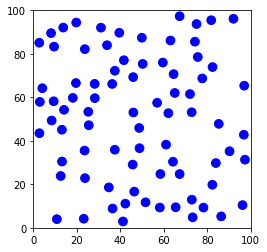

Average acceptance: 0.3363333333333333 with q = 10 and packing fraction: 0.09927432785343747


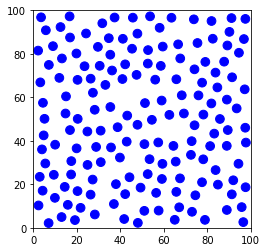

Average acceptance: 0.054 with q = 10 and packing fraction: 0.19980529276831085


KeyboardInterrupt: 

In [5]:
L = 100
sigma = 2
loop = 3000
q_values = [10, 15]
packing_values = [0.1, 0.2, 0.3, 0.4, 0.5]

for q in q_values:
    for packing_value in packing_values:
        N = int(packing_value * L**2 / (math.pi * sigma**2))
        packing_fraction = N * math.pi * sigma**2 / L**2
        box = initial_configuration(N, L, sigma)
        average_acceptance = 0
        for i in range(loop):
            box, accepted = perform_move(box, L, sigma, q)
            average_acceptance += accepted

        show_configuration(box, L, sigma)
        average_acceptance = average_acceptance / loop
        print(f"Average acceptance: {average_acceptance} with q = {q} and packing fraction: {packing_fraction}")

exercise 3:
Compute g(r) for some values of eta. Show that g(r) becomes oscillatory at high density

In [6]:
def pair_correlation_function(positions, r, L): 
    g = []
    for sphere in positions: 
        dists = calculate_total_distances(sphere, positions, L, sigma)
        for dist in dists:
            if round(dist,2) == r:
                g.append(0.5)
    return (sum(g) * L**2) / (2 * r * N * math.pi), len(g) 

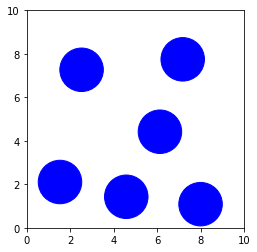

In [7]:
L = 10
sigma = 1
packing_value = 0.2
N = int(packing_value * L**2 / (math.pi * sigma**2))
box = initial_configuration(N, L, sigma)
show_configuration(box, L, sigma)

In [80]:
print(pair_correlation_function(box, 5, L))

(0.0, 0)


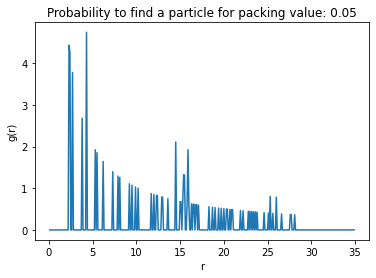

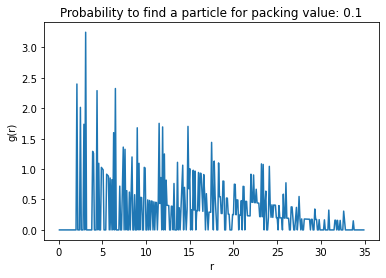

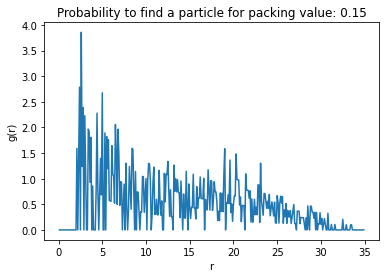

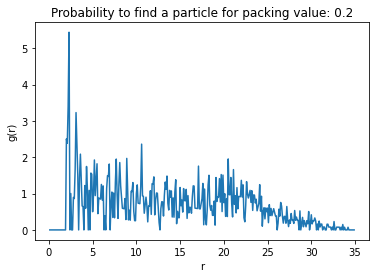

KeyboardInterrupt: 

In [8]:
packing_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
L = 50
sigma = 1

for packing_value in packing_values:
    N = int(packing_value * L**2 / (math.pi * sigma**2))
    box = initial_configuration(N, L, sigma)
    corr = []
    rs = []
    for r in range(1, 350):
        corr.append(pair_correlation_function(box, r/10, L)[0])
        rs.append(r/10)
    plt.plot(rs, corr)
    plt.title(f'Probability to find a particle for packing value: {packing_value}')
    plt.xlabel('r')
    plt.ylabel('g(r)')
    plt.show()

In [23]:
L = 100
R = 2
loop = 300
q = 1
packing_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

auto_corr = []
for packing_value in packing_values:
    N = int(packing_value * L**2 / (math.pi * R**2))
    packing_fraction = N * math.pi * R**2 / L**2
    box = initial_configuration(N, L, R)
    average_acceptance = 0
    for i in range(loop):
        box, accepted = perform_move(box, L, R, q)
        average_acceptance += accepted
    
        
autocorr = pair_correlation_function(box,5,  L)
auto_corr.append(autocorr)

In [44]:
L = 100
R = 1
q = 1
packing_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

N = int(0.05 * L**2 / (math.pi * R**2))

def calculate_unique_pairs(spheres, L, r):
    pairs = []
    for i in range(len(spheres)):
        for j in range(i + 1, len(spheres)):
            distance = calculate_distance(spheres[i], spheres[j], L, r)
            pairs.append((spheres[i], spheres[j], distance))
    return pairs


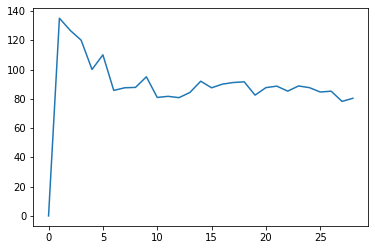

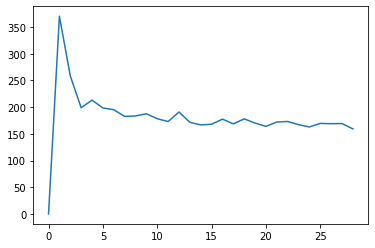

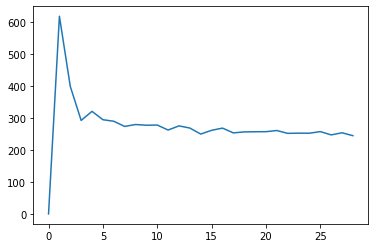

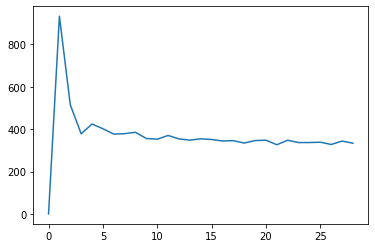

KeyboardInterrupt: 

In [50]:
def autocorr_simplified(r, pairs, L):
    delta_r = 1
    count = 0
    for pair in pairs:
        if r <pair[2] < r + delta_r:
            count += 1
            
    return count/(2 * math.pi * r * delta_r * (N/(L**2)))

packing_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
L = 100 
sigma = 1

for packing_value in packing_values:
    N = int(packing_value * L**2 / (math.pi * sigma**2))
    box = initial_configuration(N, L, sigma)
    pairs = calculate_unique_pairs(box, L, sigma)
    autocorr = []
    for r in range(1, 30):
        autocorr.append(autocorr_simplified(r, pairs, L))
    plt.plot(autocorr)
    plt.show()
